# IBM Data Science Professional Certificate Capstone Project - the Battle of Neighborhood
The purpose is for business owner who wants to open up a new restaurant in Vancouver. It was assumed there is no personal preference on the type of cuisine or location.
Some important limitations of the data include but not limit to: lack of information regarding security such as crime rate of the neighborhood; rent prices; main residents' age and income; incompleteness of information of certain "venue category" provided by foursquare API; whether or not the neighborhood includes main employers which might contribute to the demand in restaurant; whether or not this region includes toursits which might be a main consumer for restaurant; whether  etc.
Nevertheless, the distribution of restaurant available in Vancouver also implies the above-mentioned information to some extent. The data provides an initial understanding for the anyone who wants to open up a res. and it is suggested the interested personnel to investigate further.


## 1. setting up environment

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

import json

!pip install geopandas
!pip install geopy
!pip install beautifulsoup4
!pip install html5lib
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

print("Library imported.")

Library imported.


## 2. Retrieve and Pre-processing existing restaurant data with neighborhood information

In [2]:

# scraping data from website
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V'
read_table = pd.read_html(url,header=[0])
df = read_table[0]
df.head(10)

,V1AKimberley,V2APenticton,V3ALangley Township(Langley City),V4ASurreySouthwest,V5ABurnaby(Government Road / Lake City / SFU / Burnaby Mountain),V6AVancouver(Strathcona / Chinatown / Downtown Eastside),V7ARichmondSouth,V8APowell River,V9AVictoria(Vic West / Esquimalt)Canadian Forces(MARPAC)
0,V1BVernonEast,V2BKamloopsNorthwest,V3BPort CoquitlamCentral,V4BWhite Rock,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott),V6BVancouver(NE Downtown / Gastown / Harbour C...,V7BRichmond(Sea Island / YVR),V8BSquamish,V9BVictoria(West Highlands / North Langford / ...
1,V1CCranbrook,V2CKamloopsCentral and Southeast,V3CPort CoquitlamSouth,V4CDeltaNortheast,V5CBurnaby(Burnaby Heights / Willingdon Height...,V6CVancouver(Waterfront / Coal Harbour / Canad...,V7CRichmondNorthwest,V8CKitimat,V9CVictoria(Colwood / South Langford / Metchosin)
2,V1ESalmon Arm,V2EKamloopsSouth and West,V3ECoquitlamNorth,V4EDeltaEast,V5EBurnaby(Lakeview-Mayfield / Richmond Park /...,V6EVancouver(SE West End / Davie Village),V7ERichmondSouthwest,V8EWhistler,V9EVictoria(East Highlands / NW Saanich)
3,V1GDawson Creek,V2GWilliams Lake,V3GAbbotsfordEast,V4GDeltaEast Central,V5GBurnaby(Cascade-Schou / Douglas-Gilpin),V6GVancouver(NW West End / Stanley Park),V7GNorth Vancouver (district municipality)Oute...,V8GTerrace,V9GLadysmith
4,V1HVernonWest,V2HKamloopsNorth,V3HPort Moody,V4HNot assigned,V5HBurnaby(Maywood / Marlborough / Oakalla / W...,V6HVancouver(West Fairview / Granville Island ...,V7HNorth Vancouver (district municipality)Inne...,V8HNot assigned,V9HCampbell RiverOutskirts
5,V1JFort St. John,V2JQuesnel,V3JCoquitlamNorth,V4JNot assigned,V5JBurnaby(Suncrest / Sussex-Nelson / Clinton-...,V6JVancouver(NW Shaughnessy / East Kitsilano /...,V7JNorth Vancouver (district municipality)East...,V8JPrince Rupert,V9JCourtenayNorthern Outskirts
6,V1KMerritt,V2KPrince GeorgeNorth,V3KCoquitlamSouth,V4KDeltaNorthwest,V5KVancouver(North Hastings-Sunrise),V6KVancouver(Central Kitsilano / Greektown),V7KNorth Vancouver (district municipality)Nort...,V8KSalt Spring Island,V9KQualicum Beach
7,V1LNelson,V2LPrince GeorgeEast Central,V3LNew WestminsterNortheast,V4LDeltaSoutheast,V5LVancouver(North Grandview-Woodland),V6LVancouver(NW Arbutus Ridge / NE Dunbar-Sout...,V7LNorth Vancouver (city)South Central,V8LSidney(North Saanich / YYJ),V9LDuncan
8,V1MLangley TownshipNorth,V2MPrince GeorgeWest Central,V3MNew WestminsterSouthwest(Includes Annacis I...,V4MDeltaSouthwest,V5MVancouver(South Hastings-Sunrise / North Re...,V6MVancouver(South Shaughnessy / NW Oakridge /...,V7MNorth Vancouver (city)Southwest Central,V8MCentral Saanich,V9MComox
9,V1NCastlegar,V2NPrince GeorgeSouth,V3NBurnaby(East Big Bend / Stride Avenue / Edm...,V4NSurreyNortheast,V5NVancouver(South Grandview-Woodland / NE Ken...,V6NVancouver(West Kerrisdale / South Dunbar-So...,V7NNorth Vancouver (district municipality)Nort...,V8NVictoria(East Saanich),V9NCourtenayCentral


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
V1AKimberley                                                        19 non-null object
V2APenticton                                                        19 non-null object
V3ALangley Township(Langley City)                                   19 non-null object
V4ASurreySouthwest                                                  19 non-null object
V5ABurnaby(Government Road / Lake City / SFU / Burnaby Mountain)    19 non-null object
V6AVancouver(Strathcona / Chinatown / Downtown Eastside)            19 non-null object
V7ARichmondSouth                                                    19 non-null object
V8APowell River                                                     19 non-null object
V9AVictoria(Vic West / Esquimalt)Canadian Forces(MARPAC)            19 non-null object
dtypes: object(9)
memory usage: 1.4+ KB


## Vancouver's dataframe is not as nice as Toronto's, below is the modification of the dataframe to provide nx2 dataframe with one column as Neighborhood, the other as Postal code.


In [4]:
dl = df.values.tolist()
dl

[['V1BVernonEast',
  'V2BKamloopsNorthwest',
  'V3BPort CoquitlamCentral',
  'V4BWhite Rock',
  'V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott)',
  'V6BVancouver(NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown)',
  'V7BRichmond(Sea Island / YVR)',
  'V8BSquamish',
  'V9BVictoria(West Highlands / North Langford / View Royal)'],
 ['V1CCranbrook',
  'V2CKamloopsCentral and Southeast',
  'V3CPort CoquitlamSouth',
  'V4CDeltaNortheast',
  'V5CBurnaby(Burnaby Heights / Willingdon Heights / West Central Valley)',
  'V6CVancouver(Waterfront / Coal Harbour / Canada Place)',
  'V7CRichmondNorthwest',
  'V8CKitimat',
  'V9CVictoria(Colwood / South Langford / Metchosin)'],
 ['V1ESalmon Arm',
  'V2EKamloopsSouth and West',
  'V3ECoquitlamNorth',
  'V4EDeltaEast',
  'V5EBurnaby(Lakeview-Mayfield / Richmond Park / Kingsway-Beresford)',
  'V6EVancouver(SE West End / Davie Village)',
  'V7ERichmondSouthwest',
  'V8EWhistler',
  'V9EVictoria(East Highlands / N

In [5]:
dfa = np.array(dl)
print(dfa.shape)

(19, 9)


In [6]:
dfa = dfa.reshape(19*9)
print(dfa.shape)

(171,)


In [7]:
df = pd.DataFrame(dfa) 
df.head()

,0
0,V1BVernonEast
1,V2BKamloopsNorthwest
2,V3BPort CoquitlamCentral
3,V4BWhite Rock
4,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott)


In [8]:
#rename columns
dftemp1 = df.rename(index=str, columns={0:'temp'})
dftemp1.head()

,temp
0,V1BVernonEast
1,V2BKamloopsNorthwest
2,V3BPort CoquitlamCentral
3,V4BWhite Rock
4,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott)


In [9]:


#parse the geometry column into latitude and longitude
#drop points()
dftemp1['a'] = dftemp1['temp'].map(lambda x: str(x)[3:])
dftemp1['b'] = dftemp1['temp'].map(lambda x: str(x)[:3])
dftemp1 = dftemp1.drop(['temp'],axis = 1)
dftemp1.head()

,a,b
0,VernonEast,V1B
1,KamloopsNorthwest,V2B
2,Port CoquitlamCentral,V3B
3,White Rock,V4B
4,Burnaby(Parkcrest-Aubrey / Ardingley-Sprott),V5B


In [10]:
#rename columns
df = dftemp1.rename(index=str, columns={'a':'Neighborhood','b':'Postal code'})
df.head()

,Neighborhood,Postal code
0,VernonEast,V1B
1,KamloopsNorthwest,V2B
2,Port CoquitlamCentral,V3B
3,White Rock,V4B
4,Burnaby(Parkcrest-Aubrey / Ardingley-Sprott),V5B


In [11]:
df.shape

(171, 2)

In [12]:
#drop not assigned
df = df[df.Neighborhood !='Not assigned']
df.reset_index(drop=True,inplace=True)
df.head()

,Neighborhood,Postal code
0,VernonEast,V1B
1,KamloopsNorthwest,V2B
2,Port CoquitlamCentral,V3B
3,White Rock,V4B
4,Burnaby(Parkcrest-Aubrey / Ardingley-Sprott),V5B


In [13]:
df.shape

(165, 2)

More than one neighborhood can exist in one postal code area, combine rows

In [14]:
#check if more than one neighborhood existing in one postal code area is true for this data
df['Neighborhood'].groupby(df['Postal code']).nunique()

Postal code
V1B    1
V1C    1
V1E    1
V1G    1
V1H    1
V1J    1
V1K    1
V1L    1
V1M    1
V1N    1
V1P    1
V1R    1
V1S    1
V1T    1
V1V    1
V1W    1
V1X    1
V1Y    1
V1Z    1
V2B    1
V2C    1
V2E    1
V2G    1
V2H    1
V2J    1
V2K    1
V2L    1
V2M    1
V2N    1
V2P    1
V2R    1
V2S    1
V2T    1
V2V    1
V2W    1
V2X    1
V2Y    1
V2Z    1
V3B    1
V3C    1
V3E    1
V3G    1
V3H    1
V3J    1
V3K    1
V3L    1
V3M    1
V3N    1
V3R    1
V3S    1
V3T    1
V3V    1
V3W    1
V3X    1
V3Y    1
V3Z    1
V4B    1
V4C    1
V4E    1
V4G    1
V4K    1
V4L    1
V4M    1
V4N    1
V4P    1
V4R    1
V4S    1
V4T    1
V4V    1
V4W    1
V4X    1
V4Z    1
V5B    1
V5C    1
V5E    1
V5G    1
V5H    1
V5J    1
V5K    1
V5L    1
V5M    1
V5N    1
V5P    1
V5R    1
V5S    1
V5T    1
V5V    1
V5W    1
V5X    1
V5Y    1
V5Z    1
V6B    1
V6C    1
V6E    1
V6G    1
V6H    1
V6J    1
V6K    1
V6L    1
V6M    1
V6N    1
V6P    1
V6R    1
V6S    1
V6T    1
V6V    1
V6W    1
V6X    1
V6Y    1
V6Z    

In [15]:
#put "postal code" as the first column
df = df[['Postal code','Neighborhood']]
df.head()

,Postal code,Neighborhood
0,V1B,VernonEast
1,V2B,KamloopsNorthwest
2,V3B,Port CoquitlamCentral
3,V4B,White Rock
4,V5B,Burnaby(Parkcrest-Aubrey / Ardingley-Sprott)


In [16]:
#unfortunately the provided geo-csv includes only Toronto coordinates data, and geocoder
#is really discouraging.
#geonames.org provides free coordinates-zipcode data and that is what I used here.

df_geo = pd.read_csv("CA.csv")
df_geo.head()

,Postal,Lat,Long
0,T0A,54.7660,-111.7174
1,T0B,53.0727,-111.5816
2,T0C,52.1431,-111.6941
3,T0E,53.6758,-115.0948
4,T0G,55.6993,-114.4529


In [17]:
#initiating latitude and longitude
df['Latitude'] = '0';
df['Longitude'] = '0';

#adding coordinates
for i in df.index:
    for j in df_geo.index:
        if df.iloc[i, 0] == df_geo.iloc[j, 0]:
            df.iloc[i, 2] = df_geo.iloc[j, 1]
            df.iloc[i, 3] = df_geo.iloc[j, 2]
            
df.head()


,Postal code,Neighborhood,Latitude,Longitude
0,V1B,VernonEast,50.084,-118.938
1,V2B,KamloopsNorthwest,50.8869,-120.736
2,V3B,Port CoquitlamCentral,49.274,-122.765
3,V4B,White Rock,49.0259,-122.806
4,V5B,Burnaby(Parkcrest-Aubrey / Ardingley-Sprott),49.2769,-122.976


In [18]:
address = 'Vancouver, Canada'
geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [19]:
# create map of restaurants in Vancouver using latitude and longitude values
map_vc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neigh in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(neigh, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vc)  
    
map_vc

In [32]:


## Using the Foursquare API to explore the regions near each neighborhood
#define foursquare credentials

CLIENT_ID = 'ADEAGQE5LK3IKPH33ONIL5DTABARUS04RI2W0EAUE3JV3QRH' 
CLIENT_SECRET = 'W5TPIHHRPL3XIGYRKGZQ1DQAG1IDPXJ3KW45ZEONANUSZBP2' 
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: ADEAGQE5LK3IKPH33ONIL5DTABARUS04RI2W0EAUE3JV3QRH
CLIENT_SECRET:W5TPIHHRPL3XIGYRKGZQ1DQAG1IDPXJ3KW45ZEONANUSZBP2


In [33]:
radius = 1000
LIMIT = 200

venues = []
for lat, long, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))


In [34]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude','Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']

print(venues_df.shape)
venues_df.head()

(4138, 7)


,Neighborhood,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Port CoquitlamCentral,49.274,-122.7649,Arms Pub,49.271901,-122.757145,Pub
1,Port CoquitlamCentral,49.274,-122.7649,Pho Tan Phat,49.271024,-122.755339,Vietnamese Restaurant
2,Port CoquitlamCentral,49.274,-122.7649,San Remo Pizza,49.267577,-122.773518,Italian Restaurant
3,Port CoquitlamCentral,49.274,-122.7649,RBC Royal Bank,49.272952,-122.756417,Bank
4,Port CoquitlamCentral,49.274,-122.7649,7-Eleven,49.272992,-122.755555,Convenience Store


In [35]:
# Extracting the rows with Venue Category as a Restaurant
df1 = venues_df.loc[venues_df['Venue Category'].str.contains('Restaurant') == True]

In [36]:
df1.head()

,Neighborhood,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
1,Port CoquitlamCentral,49.2740,-122.7649,Pho Tan Phat,49.271024,-122.755339,Vietnamese Restaurant
2,Port CoquitlamCentral,49.2740,-122.7649,San Remo Pizza,49.267577,-122.773518,Italian Restaurant
27,White Rock,49.0259,-122.8058,Uli's Restaurant,49.021369,-122.805943,Restaurant
28,White Rock,49.0259,-122.8058,Taka's Sushi,49.023651,-122.800515,Japanese Restaurant
30,White Rock,49.0259,-122.8058,Kappa Japanese Restaurant,49.028604,-122.799631,Japanese Restaurant


In [73]:
df1.shape

(1064, 8)

In [37]:
address = 'Vancouver, Canada'
geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [83]:
# create map of restaurants in Vancouver using latitude and longitude values
map_vc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, venue in zip(df1['Latitude'], df1['Longitude'], df1['Venue Name']):
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vc)  
    
map_vc

## Using KMeans Machine Learning Algorithm for the clustering of the Restaurants near neighborhoods

In [39]:
# Creating Dummy Variables for Venue Category
onehot = pd.get_dummies(df1['Venue Category'],prefix='',prefix_sep='')
# Creating a copy of data frame
dftemp = df1
# Merging the dummy variables with the original dataframe
df2 = pd.merge(dftemp,onehot,on=dftemp.index)
cg = df2.drop(['Neighborhood','Latitude','Longitude','Venue Name','Venue Latitude','Venue Longitude','Venue Category'],axis=1)
cg.head()

,key_0,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
cg.drop(['key_0'],axis=1,inplace=True)


In [41]:
kclusters = 30
kmeans = []

for k in range(2,kclusters): 
# run k-means clustering
   locals()['kmeans_' + str(k)] = KMeans(init = "k-means++", n_clusters=k, random_state=0).fit(cg)
# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

In [30]:
Xaxis = range(2,kclusters)
Yaxis = []

for i in range(2,kclusters):
    print("kmeans_"+str(i)+'.'+"inertia_:", eval(str(("kmeans_"+str(i)+'.'+"inertia_"))))
    Yaxis.append(eval(str(("kmeans_"+str(i)+'.'+"inertia_"))))

kmeans_2.inertia_: 905.8584807492194
kmeans_3.inertia_: 820.3142201834862
kmeans_4.inertia_: 730.6100386100387
kmeans_5.inertia_: 650.3526011560693
kmeans_6.inertia_: 568.3416252072968
kmeans_7.inertia_: 517.1090909090909
kmeans_8.inertia_: 450.2473794549267
kmeans_9.inertia_: 404.62470862470866
kmeans_10.inertia_: 368.66326530612247
kmeans_11.inertia_: 324.10465116279073
kmeans_12.inertia_: 286.75
kmeans_13.inertia_: 255.66789667896686
kmeans_14.inertia_: 248.9138576779026
kmeans_15.inertia_: 206.21004566210047
kmeans_16.inertia_: 182.94845360824743
kmeans_17.inertia_: 171.63934426229508
kmeans_18.inertia_: 147.34615384615384
kmeans_19.inertia_: 139.5066666666667
kmeans_20.inertia_: 126.75
kmeans_21.inertia_: 113.65853658536587
kmeans_22.inertia_: 102.05555555555556
kmeans_23.inertia_: 86.65934065934066
kmeans_24.inertia_: 73.10526315789474
kmeans_25.inertia_: 95.10000000000001
kmeans_26.inertia_: 76.6024096385542
kmeans_27.inertia_: 71.92207792207793
kmeans_28.inertia_: 64.6000000000

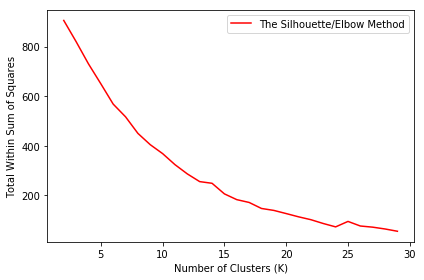

In [42]:
import matplotlib.pyplot as plt
plt.plot(Xaxis, Yaxis, 'r')
plt.legend(('The Silhouette/Elbow Method', ''))
plt.ylabel('Total Within Sum of Squares')
plt.xlabel('Number of Clusters (K)')
plt.tight_layout()
plt.show()

In [43]:
k=24
kmeans = KMeans(n_clusters=k,random_state=0).fit(cg)
kmeans.labels_[0:10]



array([ 6,  9,  4,  1,  1, 17,  1, 12, 22, 22], dtype=int32)

In [44]:
df1.insert(0,'Cluster Labels',kmeans.labels_)
df1.head()

,Cluster Labels,Neighborhood,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
1,6,Port CoquitlamCentral,49.2740,-122.7649,Pho Tan Phat,49.271024,-122.755339,Vietnamese Restaurant
2,9,Port CoquitlamCentral,49.2740,-122.7649,San Remo Pizza,49.267577,-122.773518,Italian Restaurant
27,4,White Rock,49.0259,-122.8058,Uli's Restaurant,49.021369,-122.805943,Restaurant
28,1,White Rock,49.0259,-122.8058,Taka's Sushi,49.023651,-122.800515,Japanese Restaurant
30,1,White Rock,49.0259,-122.8058,Kappa Japanese Restaurant,49.028604,-122.799631,Japanese Restaurant


In [57]:
df1.shape

(1064, 8)

In [45]:
#Creating the map of all the restaurants along with their cuisine 
#specialities and plotting all the neighborhood on the same map for evaluation purpose. 
#The clusters in the map shows different types of restaurants on the basis of different
#attributes, mainly cuisine.


# create map

map_clusters = folium.Map(location=[49.2608724, -123.1139529], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, name, cat, cluster in zip(df1['Venue Latitude'], df1['Venue Longitude'],
                                        df1['Venue Name'],df1['Venue Category'], 
                                        df1['Cluster Labels']):
    label = folium.Popup(name +','+ cat + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    


    
map_clusters




## Evaluating the Clusters

### the map shows an overview of all cluster labels, since the best k is 24 - the amount of clusters is a little bit large, a count of which clusters to be investigated futher is performed.

In [93]:
df1['Cluster Labels'].value_counts(bins=26)


(1.769, 2.654]      103
(0.885, 1.769]       95
(2.654, 3.538]       89
(3.538, 4.423]       89
(9.731, 10.615]      85
(-0.024, 0.885]      76
(5.308, 6.192]       73
(8.846, 9.731]       53
(7.962, 8.846]       48
(10.615, 11.5]       43
(4.423, 5.308]       42
(6.192, 7.077]       40
(13.269, 14.154]     33
(11.5, 12.385]       29
(12.385, 13.269]     27
(18.577, 19.462]     25
(14.154, 15.038]     21
(16.808, 17.692]     19
(15.923, 16.808]     16
(17.692, 18.577]     13
(19.462, 20.346]     13
(20.346, 21.231]     12
(21.231, 22.115]     10
(22.115, 23.0]       10
(15.038, 15.923]      0
(7.077, 7.962]        0
Name: Cluster Labels, dtype: int64

(array([ 76.,  95., 103.,  89.,  89.,  42.,  73.,  40.,  48.,  53.,  85.,
         43.,   0.,  29.,  27.,  33.,  21.,  16.,  19.,  13.,  25.,  13.,
         12.,  10.,  10.]),
 array([ 0.  ,  0.92,  1.84,  2.76,  3.68,  4.6 ,  5.52,  6.44,  7.36,
         8.28,  9.2 , 10.12, 11.04, 11.96, 12.88, 13.8 , 14.72, 15.64,
        16.56, 17.48, 18.4 , 19.32, 20.24, 21.16, 22.08, 23.  ]),
 <a list of 25 Patch objects>)

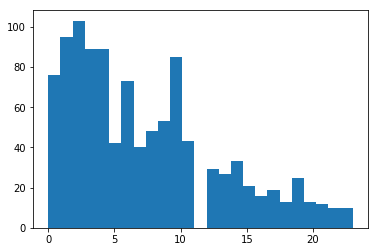

In [95]:
dfc = df1['Cluster Labels']
plt.hist(dfc, bins = 25)

### Based on the output, cluster 1, 2, 3, 4, 10 ,0(including 537 venues) will be investigated. This is also logically reasonable since the total number of restaurant venues is 1064, the investigated venues are more than 532. 

In [52]:
cluster0 = df1.loc[df1['Cluster Labels'] == 0, df1.columns[[1] + list(range(5, df1.shape[1]))]]
cluster0['Venue Category'].value_counts()
#The Cluster 0 is shown in Red Colour and contains the most number of restaurants, 
#mainly American, Japanese, Sushi, Mediterranean etc.!!! check
#italian the most, european, asian

Mediterranean Restaurant           5
Lebanese Restaurant                5
Dim Sum Restaurant                 4
Caribbean Restaurant               4
Belgian Restaurant                 4
Hotpot Restaurant                  4
Ramen Restaurant                   4
Cuban Restaurant                   3
Cajun / Creole Restaurant          3
Ethiopian Restaurant               3
Comfort Food Restaurant            2
Cantonese Restaurant               2
Taiwanese Restaurant               2
Latin American Restaurant          2
Molecular Gastronomy Restaurant    2
Filipino Restaurant                2
Shanghai Restaurant                2
Turkish Restaurant                 2
Afghan Restaurant                  2
South American Restaurant          2
Modern European Restaurant         2
Scandinavian Restaurant            2
South Indian Restaurant            2
Eastern European Restaurant        1
African Restaurant                 1
Southern / Soul Food Restaurant    1
Indonesian Restaurant              1
P

In [54]:
cluster1 = df1.loc[df1['Cluster Labels'] == 1, df1.columns[[1] + list(range(5, df1.shape[1]))]]
cluster1['Venue Category'].value_counts()
#japanese:95

Japanese Restaurant    95
Name: Venue Category, dtype: int64

In [56]:
cluster2 = df1.loc[df1['Cluster Labels'] == 2, df1.columns[[1] + list(range(5, df1.shape[1]))]]
cluster2['Venue Category'].value_counts()
#sushi: 1031

Sushi Restaurant    103
Name: Venue Category, dtype: int64

In [59]:
cluster3 = df1.loc[df1['Cluster Labels'] == 3, df1.columns[[1] + list(range(5, df1.shape[1]))]]
cluster3['Venue Category'].value_counts()
#Fast Food Restaurant：89

Fast Food Restaurant    89
Name: Venue Category, dtype: int64

In [60]:
cluster4 = df1.loc[df1['Cluster Labels'] == 4, df1.columns[[1] + list(range(5, df1.shape[1]))]]
cluster4['Venue Category'].value_counts()
#Restaurant：89

Restaurant    89
Name: Venue Category, dtype: int64

In [76]:
cluster10 = df1.loc[df1['Cluster Labels'] == 10, df1.columns[[1] + list(range(5, df1.shape[1]))]]
cluster10['Venue Category'].value_counts()
#Chinese

Chinese Restaurant    85
Name: Venue Category, dtype: int64

In [81]:
Japanese = pd.concat([cluster1, cluster2], axis=0)
Japanese.head()

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category
28,White Rock,49.023651,-122.800515,Japanese Restaurant
30,White Rock,49.028604,-122.799631,Japanese Restaurant
36,White Rock,49.028402,-122.801380,Japanese Restaurant
65,White Rock,49.021510,-122.806277,Japanese Restaurant
158,Vancouver(NE Downtown / Gastown / Harbour Cent...,49.275341,-123.120856,Japanese Restaurant


In [87]:

Jap = Japanese['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='No. of Jap Restaurant')
Jap.head(10)


,Neighborhood,No. of Jap Restaurant
0,RichmondCentral,8
1,Vancouver(SE West End / Davie Village),8
2,Burnaby(Burnaby Heights / Willingdon Heights /...,8
3,Vancouver(West Kitsilano / West Point Grey / J...,7
4,Vancouver(North Grandview-Woodland),7
5,Vancouver(SW Downtown),7
6,Vancouver(West Fairview / Granville Island / N...,7
7,Vancouver(West Mount Pleasant / West Riley Par...,7
8,Victoria(Cook Street Village / West Fairfield ...,6
9,Vancouver(West Kensington-Cedar Cottage / NE R...,6


In [88]:

fastfood = cluster3['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='No. of Fasfood Restaurant')
fastfood.head()



,Neighborhood,No. of Fasfood Restaurant
0,SurreyInner Northwest,6
1,RichmondNorth,5
2,West VancouverSoutheast,3
3,SurreyNorth,3
4,Prince GeorgeEast Central,3


In [90]:
Chinese = cluster10['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='No. of Chinese Restaurant')
Chinese.head()

,Neighborhood,No. of Chinese Restaurant
0,RichmondCentral,9
1,Vancouver(South Renfrew-Collingwood),8
2,Vancouver(SE Riley Park-Little Mountain / SW K...,7
3,RichmondNorth,7
4,Vancouver(West Kensington-Cedar Cottage / NE R...,6
